# PyTorch Tutorial

Author: Jian Gao<br>

Pytorch Document https://pytorch.org/docs/stable/index.html

In this notebook, pytorch version is "1.1.0"

If you have not install Pytorch before, please follow below link:<br>
https://pytorch.org/get-started/locally/

## Import Pytorch

In [2]:
import torch

## Input of Pytorch 

In Pytorch, we use tensor as input

In [4]:
X = [1, 2, 3]
X = torch.tensor(X)
X

tensor([1, 2, 3])

Some functions are samiliar with numpy, like ones, zeros

In [5]:
torch.ones(3, 3) # return 3x3 (matrix) tensor, all elements are one, float type

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [6]:
torch.zeros(3, 3) # return 3x3 (matrix) tensor, all elements are zero, float type

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

## Basic CNN layer in Pytorch

## Convolution Layer (2 dimensions)

we can use torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros'), you can want to see more detail, see https://pytorch.org/docs/stable/nn.html?highlight=conv#torch.nn.Conv2d

Now, if we have a 32x32x3 image, we want use 5x5x3 filter with stride = 1 to convolve, we will get 28x28x1 avtivation map, the depth of filter will same as the depth of image, if we want 6 different activation maps, we need 6 different 5x5x3 filters.

<img src = "img/conv1.png" width = "450" align = 'left'><img src = "img/conv2.png" width = "450" align = 'left'>

images from cs231n slides

### Create a virtural image with 32x32x3

In [21]:
image = torch.randn(32, 32, 3) # random initial
image.size() # print the size of image

torch.Size([32, 32, 3])

### Now, we need to define a 2-d convolution layer

In [22]:
myfirstconv = torch.nn.Conv2d(3, 6, 5) # input channel is 3, output channel is 6, and using 5x5 filter or kernel
# In 2 dimension convolution, channel represents depth, e.g. 5x5x3 image, the channel size is 3 

In Pytorch, the input of convolution layer is defined as (N, $C_{in}$, $H_{in}$, $W_{in}$) 

N represents batch_size, now we have one image, so N = 1 <br>
C represents the channel of image <br>
H represents the height of image <br>
W represents the width of image

we can use function "view()" to reshape the tensor size, same as "np.reshape()"

In [26]:
image = image.view(1, 3, 32, 32)
image.size()

torch.Size([1, 3, 32, 32])

### Then, we can feed our image to this convolution layer

In [27]:
myfirstconv(image).size()

torch.Size([1, 6, 28, 28])

Finally, we get the output activation maps with size 1x6x28x28

## Pooling Layer (2 dimensions)

we can use torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False), you can want to see more detail, see https://pytorch.org/docs/stable/nn.html?highlight=maxpool2d#torch.nn.MaxPool2d

<img src = "img/pooling.png" width = "450" align = 'left'>

Image from COMP9517 slides 

### Create a small image with 4x4x1

In [36]:
image = torch.tensor([[1., 1., 2., 4.], [5., 6., 7., 8.], [3., 2., 1., 0.], [1., 2., 3., 4.]])
image = image.view(1, 1, 4, 4)
image

tensor([[[[1., 1., 2., 4.],
          [5., 6., 7., 8.],
          [3., 2., 1., 0.],
          [1., 2., 3., 4.]]]])

In [37]:
myfirstmaxpooling = torch.nn.MaxPool2d(2, stride = 2) # 2 means 2x2 filters or kernel

In [39]:
myfirstmaxpooling(image)

tensor([[[[6., 8.],
          [3., 4.]]]])

## Dropout Layer

If we want 2 dimension dropout layer, we can use torch.nn.Dropout2d(p=0.5, inplace=False), you can want to see more detail, see https://pytorch.org/docs/stable/nn.html?highlight=dropout#torch.nn.Dropout2d <br>
If we want 1 dimension dropout layer, we can use torch.nn.Dropout(p=0.5, inplace=False), you can want to see more detail, see https://pytorch.org/docs/stable/nn.html?highlight=dropout#torch.nn.Dropout <br>

### Create a 1 dimension dropout layer with 50% dropout rate

In [20]:
myfirstdropout = torch.nn.Dropout(p = 0.5) # p = 0.5 means 50% probability of an element to be zeroed

In [21]:
x = torch.tensor([1., 2., 3., 4., 5.])
print("current x", x)
x = myfirstdropout(x)
print("after dropout", x)

current x tensor([1., 2., 3., 4., 5.])
after dropout tensor([ 2.,  0.,  6.,  0., 10.])


You can see some elemennts become zero. The reason the rest of element doubled is using dropout with p=0.5, we will lose half of these activations. And we deactivate dropout during testing.(https://discuss.pytorch.org/t/unclear-behaviour-of-dropout/22890/2)

## ReLU Layer

ReLU(x) = max(0, x)

<img src = "img/relu.png" width = "250" align = 'left'>

Image from Google

In [45]:
myfirstRelu = torch.nn.ReLU()

In [46]:
print(myfirstRelu(torch.tensor(5)))
print(myfirstRelu(torch.tensor(100)))
print(myfirstRelu(torch.tensor(-50)))

tensor(5)
tensor(100)
tensor(0)


### Fully Connection Layer

we can use torch.nn.Linear(in_features, out_features, bias=True), you can want to see more detail, see https://pytorch.org/docs/stable/nn.html?highlight=linear#torch.nn.Linear

in_features means the number of input neuros<br>
out_features means the number of output neuros<br>
In below image, the in_features is 5, the out_features is 3<br>

<img src = "img/linear.png" width = "200">

In [25]:
x = torch.randn(5)
print("input size:", x.size())
myfirstlinear = torch.nn.Linear(5, 3)
print("output size:", myfirstlinear(x).size())

input size: torch.Size([5])
output size: torch.Size([3])


## Now, we can create a very samll CNN network

In [11]:
class SmallNetWork(torch.nn.Module):
    def __init__(self):
        super(SmallNetWork, self).__init__()
        
        # conv layers: feature extractor
        # using nn.Sequential can concate layer together and more less code
        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 10, kernel_size = 5),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),
            torch.nn.Conv2d(10, 20, kernel_size = 5),
            torch.nn.Dropout2d(0.5),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU()
        )
        
        # fc layers: classifier
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(320, 50),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(50, 10),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        # flatten the final output of conv_layers
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        # softmax can output log probability of each potential classes
        return torch.nn.functional.log_softmax(x, dim = 1)

## Load CSV File

In [2]:
import pandas as pd
data = pd.read_csv("src/mnist_train.csv")
train_data = data[:2000]
test_data = data[2000:2500]

In [3]:
print("# train data", len(train_data))
print("# test data", len(test_data))

# train data 2000
# test data 500


In [17]:
train_label = train_data['label']
train_label = torch.tensor(train_label)
test_label = test_data['label']
test_label = torch.tensor(test_label.to_numpy())

## Preprocessing

Normally, pixel value is in range [0, 255], we can do simple normalizatoin into [0, 1], it may let calculation faster and easier to converage

In [18]:
train_data = train_data.drop(["label"], axis = 1)
train_data = train_data.to_numpy() / 255
test_data = test_data.drop(["label"], axis = 1)
test_data = test_data.to_numpy() / 255

## Put Data Into torch tensor

In [19]:
train_data = torch.tensor(train_data, dtype = torch.float32).view(-1, 1, 28, 28)
test_data = torch.tensor(test_data, dtype = torch.float32).view(-1, 1, 28, 28)

## Main Function

When you run below code, it may take few minutes to train the model

In [26]:
# define our model
model = SmallNetWork()
# define learning rate
learning_rate = 1e-3
# define optimizer, you can change to SGD or other optimizers
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# define loss function, as this is classification problem, we can use CrossEntropy Loss function
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(300):
    # train mode
    model.train()
    y_pred = model(train_data)
    # calculate loss
    loss = criterion(y_pred, train_label)
    # calculate backpropogation
    loss.backward()
    # update parameters
    optimizer.step()
    # reset our optimizer
    optimizer.zero_grad()
    # print loss
    if (epoch + 1) % 50 == 0:
        print("epoch:", epoch + 1, "loss:", loss.item())

epoch: 50 loss: 0.8088286519050598
epoch: 100 loss: 0.45997485518455505
epoch: 150 loss: 0.3428522050380707
epoch: 200 loss: 0.282133013010025
epoch: 250 loss: 0.24708323180675507
epoch: 300 loss: 0.18074654042720795


In [27]:
model.eval() # test mode, will not use dropout
test_pred = model(test_data)

In [28]:
test_pred.size()

torch.Size([500, 10])

In [29]:
_, test_pred = torch.max(test_pred, dim = 1) # get highest probability classes as final result

In [30]:
test_pred.size()

torch.Size([500])

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def visualization(image, label, predict):
    pixels = np.array(image, dtype = 'uint8')
    image = image.reshape((28, 28))
    plt.title(f'label is {label}, predict label is {predict}')
    plt.imshow(image, cmap = 'gray')
    plt.show()

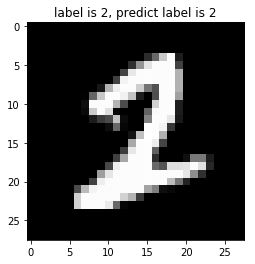

In [32]:
visualization(test_data[10], test_label[10], test_pred[10])

## Get accuracy

In [33]:
model.eval() # will not use dropout
train_pred = model(train_data)
_, train_pred = torch.max(train_pred, dim = 1)
print("train acc:", round((train_label == train_pred).type(torch.float32).mean().item() * 100, 2))
print("test acc:", round((test_label == test_pred).type(torch.float32).mean().item() * 100, 2))

train acc: 93.8
test acc: 91.0
